# Risk analysis

### Generating data

In [1]:
# Importing and data
import theano.tensor as T
import theano
import sys, os
sys.path.append("../")
sys.path.append("../gempy")

# Importing GeMpy modules
import gempy as GeMpy

# Reloading (only for development purposes)
#import importlib
#importlib.reload(GeMpy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

%matplotlib qt5
#%matplotlib notebook



# Importing the data from csv files and settign extent and resolution
geo_data = GeMpy.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         path_f = os.pardir+"/input_data/FabLessPoints_Foliations.csv",
                         path_i = os.pardir+"/input_data/FabLessPoints_Points.csv")

In [2]:
# Assigning series to formations as well as their order (timewise)
GeMpy.set_data_series(geo_data, {"fault":geo_data.formations[4], 
                      "Rest":np.delete(geo_data.formations, 4)},
                       order_series = ["fault",
                                       "Rest",
                                       ], verbose=0)

In [5]:
geo_data.n_faults = 1

In [6]:
GeMpy.data_to_pickle(GeMpy.select_series(geo_data, ['Rest']), 'NoFault')

In [3]:
GeMpy.data_to_pickle(geo_data, 'BasicFault')

In [6]:
data_int = GeMpy.InterpolatorInput(geo_data, dtype='float64',
                                  verbose = ['potential_field_at_interfaces'])
f = data_int.compile_th_fn()
i = data_int.get_input_data()

I am in the setting
float64
I am here
[2, 2]
[0 9]


In [7]:
s = f(*i)
s.shape

Value of the potential field at the interfaces __str__ = [-0.008189 -0.075733 -0.084526 -0.115309 -0.13576 ]
Value of the potential field at the interfaces __str__ = [ 0.211156  0.157476  0.274137  0.254995  0.094725]


(1, 3, 125000)

In [6]:
np.save('pot_field', s[0,1,:])

In [67]:
a = (np.zeros_like(geo_data.grid.grid[:, 0]).astype(bool).
reshape(9,9,9))

In [65]:
b = np.indices((9,9,9))
b[2, 0, :, :]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8],
       [0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [59]:
b[1, 0, :, :]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8]])

In [76]:
b[1,0,2:4,2:4]

array([[2, 2],
       [3, 3]])

In [75]:
a[7,4,0] = True
geo_data.grid.grid[np.ravel(a)]

array([[    0.,  1000.,  -250.],
       [ 1750.,  1000., -2000.]], dtype=float32)

In [60]:
geo_data.grid.grid[0, 4, 7]

IndexError: too many indices for array

In [34]:
np.indices?

In [22]:
GeMpy.plot_data(geo_data)

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = geo_data.grid.grid[:,0]
ys = geo_data.grid.grid[:,1]
zs = geo_data.grid.grid[:,2]

ax.scatter(xs, ys, zs, )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [4]:
geo_data.interfaces

,X,Y,Z,formation,series,order_series
0,800.0,200.0,-1400.0,Reservoir,Default serie,1
21,600.0,1000.0,-650.0,Seal,Default serie,1
22,1300.0,1000.0,-700.0,Seal,Default serie,1
23,1600.0,1000.0,-800.0,Seal,Default serie,1
24,1900.0,1000.0,-900.0,Seal,Default serie,1
25,2000.0,1000.0,-875.0,Seal,Default serie,1
26,600.0,1000.0,-1350.0,NonReservoirDeep,Default serie,1
27,300.0,1000.0,-1250.0,NonReservoirDeep,Default serie,1
20,900.0,1000.0,-750.0,Seal,Default serie,1
28,2000.0,1000.0,-1575.0,NonReservoirDeep,Default serie,1


In [11]:
geo_data.extent

array([    0,  2000,     0,  2000, -2000,     0])

In [5]:
import visualization_vtk as vv
vv.visualize(geo_data)

In [5]:
#!/usr/bin/env python
 
import vtk
 
# Create a superquadric
superquadricSource = vtk.vtkSuperquadricSource()
superquadricSource.SetPhiRoundness(3.1)
superquadricSource.SetThetaRoundness(1.0)
superquadricSource.Update()  # needed to GetBounds later
 
renderer = vtk.vtkRenderer()
 
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(superquadricSource.GetOutputPort())
 
superquadricActor = vtk.vtkActor()
superquadricActor.SetMapper(mapper)
 
cubeAxesActor = vtk.vtkCubeAxesActor()
cubeAxesActor.SetBounds(superquadricSource.GetOutput().GetBounds())
cubeAxesActor.SetCamera(renderer.GetActiveCamera())
cubeAxesActor.GetTitleTextProperty(0).SetColor(1.0, 0.0, 0.0)
cubeAxesActor.GetLabelTextProperty(0).SetColor(1.0, 0.0, 0.0)
 
cubeAxesActor.GetTitleTextProperty(1).SetColor(0.0, 1.0, 0.0)
cubeAxesActor.GetLabelTextProperty(1).SetColor(0.0, 1.0, 0.0)
 
cubeAxesActor.GetTitleTextProperty(2).SetColor(0.0, 0.0, 1.0)
cubeAxesActor.GetLabelTextProperty(2).SetColor(0.0, 0.0, 1.0)
 
cubeAxesActor.DrawXGridlinesOn()
cubeAxesActor.DrawYGridlinesOn()
cubeAxesActor.DrawZGridlinesOn()
if vtk.VTK_MAJOR_VERSION > 5:
    cubeAxesActor.SetGridLineLocation(vtk.VTK_GRID_LINES_FURTHEST)
 
cubeAxesActor.XAxisMinorTickVisibilityOff()
cubeAxesActor.YAxisMinorTickVisibilityOff()
cubeAxesActor.ZAxisMinorTickVisibilityOff()
 
renderer.AddActor(cubeAxesActor)
renderer.AddActor(superquadricActor)
renderer.GetActiveCamera().Azimuth(30)
renderer.GetActiveCamera().Elevation(30)
 
renderer.ResetCamera()
 
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
 
renderWindowInteractor = vtk.vtkRenderWindowInteractor()
renderWindowInteractor.SetRenderWindow(renderWindow)
 
renderWindow.Render()
renderWindowInteractor.Start()
del renderWindow, renderWindowInteractor

In [3]:
GeMpy.data_to_pickle(geo_data)

In [3]:
geo_data.data_to_pickle()

In [3]:
geo_data.formations

array(['Reservoir', 'SecondaryReservoir', 'Seal', 'NonReservoirDeep', 'MainFault'], dtype=object)

In [4]:
# Assigning series to formations as well as their order (timewise)
GeMpy.set_data_series(geo_data, {"fault":geo_data.formations[4], 
                      "Rest":np.delete(geo_data.formations, 4)},
                       order_series = ["fault",
                                       "Rest",
                                       ], verbose=0)

In [30]:
geo_data_s = GeMpy.select_series(geo_data, ["fault"])

In [5]:
# Select series to interpolate (if you do not want to interpolate all)
data_interp = GeMpy.set_interpolator(geo_data,
                                     verbose = ['potential_field_at_interfaces'],
                                    dtype='float64')

I am in the setting
I am here
[2, 2]


In [32]:
# This are the shared parameters and the compilation of the function. This will be hidden as well at some point
input_data_T = data_interp.interpolator.tg.input_parameters_list()

In [33]:
data_interp.interpolator.tg.len_series_i.get_value()

array([ 0,  4, 34])

In [34]:
# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep(u_grade=[3]) 

[3]


In [35]:
# HERE when we compile we have to pass the number of formations that are faults!!
debugging = theano.function(input_data_T, data_interp.interpolator.tg.whole_block_model(0), on_unused_input='ignore', 
                            allow_input_downcast=True, profile=True);

In [36]:
# Solution of theano
sol = debugging(input_data_P[0], input_data_P[1], input_data_P[2], input_data_P[3],input_data_P[4], input_data_P[5])

Value of the potential field at the interfaces __str__ = [-0.559606 -0.697137 -0.742045 -0.790696 -0.831238]


In [12]:
data_interp.rescaling_factor*data_interp.interpolator.tg.a_T.get_value()

3464.10151720047

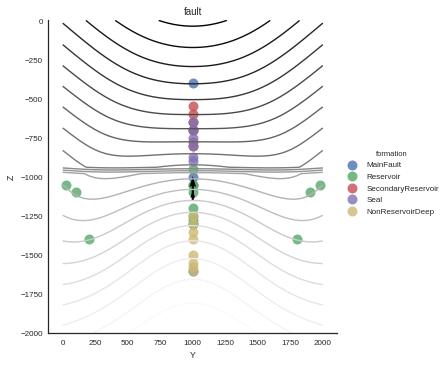

In [13]:

GeMpy.plot_potential_field(geo_data, sol[0, 1, :], 25, direction='x')

In [ ]:
GeMpy.plot_section(geo_data, 100, block=sol[0,0, :], direction='y', plot_data=True)

In [7]:
import numpy as np
import pandas as pn

In [8]:
geo_res = pn.read_csv('voxet_sub.vox')

In [9]:
geo_res = geo_res.iloc[9:]
#, geo_data.formations
ip_addresses = geo_res['nx 500'].unique()#geo_data.interfaces["formation"].unique()
ip_dict = dict(zip(ip_addresses, range(1, len(ip_addresses) + 1)))
#ip_dict['Murchison'] = 0
#ip_dict['out'] = 0
#ip_dict['SimpleMafic'] = 4
geo_res_num = geo_res['nx 500'].replace(ip_dict)


array([[[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ..., 
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ..., 
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ..., 
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3],
        [ 3,  3,  3, ...,  3,  3,  3]],

       ..., 
       [[11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11],
        ..., 
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ..., 11, 11, 11],
        [11, 11, 11, ...,  3

In [28]:
a =  geo_res_num.as_matrix()

In [38]:

#perth = np.tile(geo_res_num.as_matrix().reshape(500, 500, 8), (1,1,10))
perth = a.reshape(500, 500, 8, order='F')
#perth = np.tile(geo_res_num.as_matrix().reshape(500, 500, 8), (1,1,10))
perth = np.repeat(perth, 10, axis=2)

In [39]:
perth.shape

(500, 500, 80)

In [40]:
ip_dict

{'Basement': 2,
 'Cattamarra_Coal_Measures': 4,
 'DefaultCover': 11,
 'Eneabba_Fm': 5,
 'Kockatea_Shale': 8,
 'Late_Permian': 9,
 'Lesueur_Ss': 6,
 'Neocomian_Unc': 10,
 'Woodada_Fm': 7,
 'Yarragadee_Fm': 1,
 'Yigarn': 3}

In [41]:
perth.shape

(500, 500, 80)

In [42]:



from evtk.hl import imageToVTK 

import numpy as np  

# Dimensions 

nx, ny, nz = perth.shape

ncells = nx * ny * nz 

npoints = (nx + 1) * (ny + 1) * (nz + 1) 

# Variables 

lith =  perth



imageToVTK("./PerthBasin", 
   #        cellData = {"lith_cell" : lith},
           pointData = {"lith_point" : lith} 
          )


'/home/miguel/PycharmProjects/GeMpy/Prototype Notebook/PerthBasin.vti'

In [14]:
from evtk.hl import imageToVTK 

import numpy as np  

# Dimensions 

nx, ny, nz = 200,200,200

ncells = nx * ny * nz 

npoints = (nx + 1) * (ny + 1) * (nz + 1) 

# Variables 

lith = sol[0,0, :].reshape( (nx, ny, nz), order = 'C') 



imageToVTK("./FabianModel_point_good_res", 
   #        cellData = {"lith_cell" : lith},
           pointData = {"lith_point" : lith} 
          )

'/home/miguel/PycharmProjects/GeMpy/Prototype Notebook/FabianModel_point_good_res.vti'

In [38]:
sol

array([[ 1.      ,  1.      ,  1.      , ...,  0.      ,  0.      ,  0.      ],
       [-0.23527 , -0.228651, -0.222032, ..., -0.897181, -0.890561, -0.883942]])

In [37]:
from skimage import measure



vertices, simplices = measure.marching_cubes(sol[1,:].reshape(50,50,50), -0.559606,
                                            spacing=(10.0, 10.0, 10.0),)
x,y,z = zip(*vertices)
# vertices, simplices = measure.marching_cubes(sol[1,:].reshape(50,50,50), 0.43724)
# x2,y2,z2 = zip(*vertices)
# vertices, simplices = measure.marching_cubes(sol[1,:].reshape(50,50,50), 0.414782)
# x3,y3,z3 = zip(*vertices)
# vertices, simplices = measure.marching_cubes(sol[1,:].reshape(50,50,50), 0.220775)
# x4,y4,z4 = zip(*vertices)

In [22]:
vertices.max()

490.0

In [39]:
import vtk
from vtk import *
 
#setup points and vertices
Points = vtk.vtkPoints()
Triangles = vtk.vtkCellArray()
Triangle = vtk.vtkTriangle()

for p in vertices*0.4:
    Points.InsertNextPoint(p)

#Unfortunately in this simple example the following lines are ambiguous.
#The first 0 is the index of the triangle vertex which is ALWAYS 0-2.
#The second 0 is the index into the point (geometry) array, so this can range from 0-(NumPoints-1)
#i.e. a more general statement is triangle->GetPointIds()->SetId(0, PointId);

for i in simplices:

    Triangle.GetPointIds().SetId(0, i[0])
    Triangle.GetPointIds().SetId(1, i[1])
    Triangle.GetPointIds().SetId(2, i[2])


    Triangles.InsertNextCell(Triangle)

polydata = vtk.vtkPolyData()
polydata.SetPoints(Points)
polydata.SetPolys(Triangles)
 
polydata.Modified()
if vtk.VTK_MAJOR_VERSION <= 5:
    polydata.Update()
 
writer = vtk.vtkXMLPolyDataWriter();
writer.SetFileName("Fabian_f.vtp");
if vtk.VTK_MAJOR_VERSION <= 5:
    writer.SetInput(polydata)
else:
    writer.SetInputData(polydata)
writer.Write()

1

In [1]:
import numpy as np
vertices = np.load('vertices.npy')
simpleces = np.load('simplices.npy')

In [6]:
Triangle1.

Object `Triangle1.SetID` not found.


In [ ]:
Triangle1.GetPointIds().SetId

In [21]:
Vertices

(vtkCommonDataModelPython.vtkCellArray)0x7fe6b67906a8

In [17]:
Res = np.array([x,y,z]).T
Non_res_deep = np.array([x4,y4,z4]).T
seal = np.array([x3,y3,z3]).T
sec_res = np.array([x2,y2,z2]).T
#np.save('block_faults', sol[0,0,:])

In [23]:
np.save('vertices', vertices)

In [24]:
np.save('simplices', simplices)

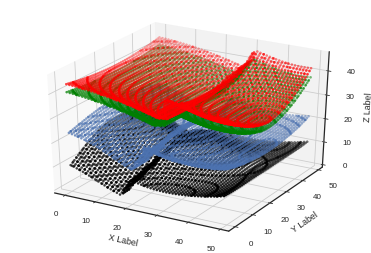

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
m = "."
ax.scatter(x, y, z, marker=m)
ax.scatter(x2, y2, z2, c='r', marker=m)
ax.scatter(x3, y3, z3, c='g', marker=m)
ax.scatter(x4, y4, z4, c='black', marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
np.min(z)


## PyMC3

Input data is a list of arrays with the different values as follows

- Dips position
- Dip Angles
- Azimuth
- Polarity
- Interfaces points:
    - Reference  points
    - Rest points

In [6]:
data_interp.interfaces['formation'].unique()

array(['Reservoir', 'Seal', 'NonReservoirDeep', 'MainFault', 'SecondaryReservoir'], dtype=object)

In [7]:
select = data_interp.interpolator.pandas_rest_layer_points['formation'] == 'Reservoir'

It is important to notice that in the array ref_layer_points, the values are tiled so it would be necessary to change all of them. At some point it would be nice to tile them in theano I guess.

So the next step is to compile the theano graph that creates the GeMpy model, not as a function but as a theano operation. Basically this is like compress a bunch of theano operations in one

In [8]:
# Everytime you want to compile the theano graph just reset all the theano shared with the next 3 lines of code. I am 
# investigating to try to avoid it but in any case at some point it will be hidden to the user

data_interp = GeMpy.set_interpolator(geo_data)
# This are the shared parameters and the compilation of the function. This will be hidden as well at some point
input_data_T = data_interp.interpolator.tg.input_parameters_list()
# This prepares the user data to the theano function
input_data_P = data_interp.interpolator.data_prep(u_grade=[3,3]) 



geomodel = theano.OpFromGraph(input_data_T, [data_interp.interpolator.tg.whole_block_model(1)], on_unused_input='ignore')

I am in the setting
I am here
[2, 2]
[3, 3]


Because now the GeMpy model is a theano operation and not a theano function, to call it we need to use theano variables (with theano functions we call them with python variables). This is very easy to modify, we just need to use theano shared to convert our python input data into theano variables.

The pymc3 objects are already theano variables (pm.Normal and so on). Now the trick is that using the theano function T.set_subtensor, we can change one deterministic value of the input arrays(the ones printed in the cell above) by a stochastic pymc3 object. Then with the new arrays we just have to call the theano operation and pymc will do the rest

In [9]:
# This is the creation of the model
import pymc3 as pm
theano.config.compute_test_value = 'off'
model = pm.Model()
with model:
    # Stochastic value
    reservoir = pm.Normal('reservoir', np.array([0], dtype='float64')
                          , sd=np.array([0.09], dtype='float64'), dtype='float64', shape=(1))
    
    # We convert a python variable to theano.shared
    ref = theano.shared(input_data_P[4])
    rest = theano.shared(input_data_P[5])
    
    # We add the stochastic value to the correspondant array
    ref = pm.Deterministic('reference', T.set_subtensor(
       ref[T.nonzero(T.cast(select.as_matrix(), "int8"))[0], 2],
       ref[T.nonzero(T.cast(select.as_matrix(), "int8"))[0], 2]+reservoir))
    rest = pm.Deterministic('rest', T.set_subtensor(
        rest[T.nonzero(T.cast(select.as_matrix(), "int8"))[0], 2],
        rest[T.nonzero(T.cast(select.as_matrix(), "int8"))[0], 2]+reservoir))#
  
    geo_model = pm.Deterministic('GeMpy', geomodel(theano.shared(input_data_P[0]),
                                                  theano.shared(input_data_P[1]),
                                                  theano.shared(input_data_P[2]),
                                                  theano.shared(input_data_P[3]),
                                                  ref, rest))

reservoir <class 'pymc3.model.FreeRV'>


In [10]:
theano.config.compute_test_value = 'ignore'

In [12]:
# This is the sampling
# BEFORE RUN THIS FOR LONG CHECK IN THE MODULE THEANOGRAF THAT THE FLAG THEANO OPTIMIZER IS IN 'fast_run'!!
with model:
   # backend = pm.backends.ndarray.NDArray('geomodels')
    step = pm.NUTS()
    trace = pm.sample(30, init=None, step=step, )

  0%|          | 0/30 [00:00<?, ?it/s]

NotImplementedError: We didn't implemented yet the case where scan do 0 iteration
Apply node that caused the error: for{cpu,scan_fn}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, <TensorType(int64, vector)>, <TensorType(int64, vector)>, <TensorType(int64, vector)>, <TensorType(int64, vector)>, <TensorType(float32, matrix)>, <TensorType(float32, scalar)>, <TensorType(float32, scalar)>, <TensorType(float32, scalar)>, <TensorType(float32, scalar)>, <TensorType(float32, scalar)>, <TensorType(float32, matrix)>, <TensorType(int64, vector)>, <TensorType(int64, vector)>, Position of the dips, Rest of the points of the layers, Reference points for every layer, Angle of every dip, Azimuth, Polarity)
Toposort index: 50
Inputs types: [TensorType(int64, scalar), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(float32, 3D), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(float32, matrix), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, matrix), TensorType(int64, vector), TensorType(int64, vector), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, vector), TensorType(float32, vector), TensorType(float32, vector)]
Inputs shapes: [(), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1, 3, 729), (2,), (2,), (2,), (2,), (729, 3), (), (), (), (), (), (9, 729), (5,), (5,), (2, 3), (34, 3), (34, 3), (2,), (2,), (2,)]
Inputs strides: [(), (8,), (8,), (8,), (8,), (8,), (8,), (8,), (8748, 2916, 4), (8,), (8,), (8,), (8,), (4, 2916), (), (), (), (), (), (2916, 4), (8,), (8,), (4, 8), (12, 4), (12, 4), (4,), (4,), (4,)]
Inputs values: [array(0), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), 'not shown', array([ 0, 34]), array([0, 2]), array([0, 5]), array([3, 3]), 'not shown', array(0.8882311582565308, dtype=float32), array(0.01878463476896286, dtype=float32), array(0.009999999776482582, dtype=float32), array(2.0, dtype=float32), array(4.0, dtype=float32), 'not shown', array([13,  5,  7,  4,  5]), array([1, 2, 3, 4, 5]), 'not shown', 'not shown', 'not shown', array([ 18.434999,  71.565002], dtype=float32), array([  90.,  270.], dtype=float32), array([ 1.,  1.], dtype=float32)]
Inputs type_num: [7, 7, 7, 7, 7, 7, 7, 7, 11, 7, 7, 7, 7, 11, 11, 11, 11, 11, 11, 11, 7, 7, 11, 11, 11, 11, 11, 11]
Outputs clients: [[Subtensor{int64::}(for{cpu,scan_fn}.0, Constant{1})]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-cd9a2cbe4b09>", line 12, in <module>
    geomodel = theano.OpFromGraph(input_data_T, [data_interp.interpolator.tg.whole_block_model(1)], on_unused_input='ignore')
  File "../gempy/theanograf.py", line 1309, in whole_block_model
    dict(input=self.u_grade_T[n_faults:], taps=[0])]

Debugprint of the apply node: 
for{cpu,scan_fn} [id A] <TensorType(float32, 3D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Subtensor{int64} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Shape [id I] <TensorType(int64, vector)> ''   
 | | | | | | | | |Subtensor{int64:int64:} [id J] <TensorType(int64, vector)> ''   
 | | | | | | | |   |Subtensor{int64::} [id K] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |<TensorType(int64, vector)> [id L] <TensorType(int64, vector)>
 | | | | | | | |   | |Constant{1} [id M] <int64>
 | | | | | | | |   |Constant{0} [id N] <int64>
 | | | | | | | |   |Constant{-1} [id O] <int64>
 | | | | | | | |Constant{0} [id N] <int64>
 | | | | | | |Subtensor{int64} [id P] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id Q] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id R] <TensorType(int64, vector)> ''   
 | | | | | |   |   |Subtensor{int64::} [id K] <TensorType(int64, vector)> ''   
 | | | | | |   |   |Constant{1} [id M] <int64>
 | | | | | |   |Constant{0} [id N] <int64>
 | | | | | |Subtensor{int64} [id S] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id T] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64:int64:} [id U] <TensorType(int64, vector)> ''   
 | | | | |   |   |Subtensor{int64::} [id V] <TensorType(int64, vector)> ''   
 | | | | |   |   | |<TensorType(int64, vector)> [id W] <TensorType(int64, vector)>
 | | | | |   |   | |Constant{1} [id M] <int64>
 | | | | |   |   |Constant{0} [id N] <int64>
 | | | | |   |   |Constant{-1} [id O] <int64>
 | | | | |   |Constant{0} [id N] <int64>
 | | | | |Subtensor{int64} [id X] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id Y] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id Z] <TensorType(int64, vector)> ''   
 | | | |   |   |Subtensor{int64::} [id V] <TensorType(int64, vector)> ''   
 | | | |   |   |Constant{1} [id M] <int64>
 | | | |   |Constant{0} [id N] <int64>
 | | | |Subtensor{int64} [id BA] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id BB] <TensorType(int64, vector)> ''   
 | | |   | |Subtensor{int64:int64:} [id BC] <TensorType(int64, vector)> ''   
 | | |   |   |Subtensor{int64::} [id BD] <TensorType(int64, vector)> ''   
 | | |   |   | |<TensorType(int64, vector)> [id BE] <TensorType(int64, vector)>
 | | |   |   | |Constant{1} [id M] <int64>
 | | |   |   |Constant{0} [id N] <int64>
 | | |   |   |Constant{-1} [id O] <int64>
 | | |   |Constant{0} [id N] <int64>
 | | |Subtensor{int64} [id BF] <TensorType(int64, scalar)> ''   
 | |   |Shape [id BG] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id BH] <TensorType(int64, vector)> ''   
 | |   |   |Subtensor{int64::} [id BD] <TensorType(int64, vector)> ''   
 | |   |   |Constant{1} [id M] <int64>
 | |   |Constant{0} [id N] <int64>
 | |Subtensor{int64} [id BI] <TensorType(int64, scalar)> ''   
 |   |Shape [id BJ] <TensorType(int64, vector)> ''   
 |   | |Subtensor{int64::} [id BK] <TensorType(int64, vector)> ''   
 |   |   |Subtensor{int64::} [id BL] <TensorType(int64, vector)> ''   
 |   |   | |<TensorType(int64, vector)> [id BM] <TensorType(int64, vector)>
 |   |   | |Constant{1} [id M] <int64>
 |   |   |Constant{0} [id N] <int64>
 |   |Constant{0} [id N] <int64>
 |Subtensor{:int64:} [id BN] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id J] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BO] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id BP] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id R] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BO] <int64> ''   
 |Subtensor{:int64:} [id BQ] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id U] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BO] <int64> ''   
 |Subtensor{:int64:} [id BR] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id Z] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BO] <int64> ''   
 |Subtensor{:int64:} [id BS] <TensorType(int64, vector)> ''   
 | |Subtensor{int64:int64:} [id BC] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BO] <int64> ''   
 |Subtensor{:int64:} [id BT] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id BH] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BO] <int64> ''   
 |Subtensor{:int64:} [id BU] <TensorType(int64, vector)> ''   
 | |Subtensor{int64::} [id BK] <TensorType(int64, vector)> ''   
 | |ScalarFromTensor [id BO] <int64> ''   
 |IncSubtensor{Set;:int64:} [id BV] <TensorType(float32, 3D)> ''   
 | |AllocEmpty{dtype='float32'} [id BW] <TensorType(float32, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id BX] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id CA] <TensorType(float32, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id CB] <TensorType(float32, (True, False, False))> ''   
 | | |   |     |Join [id CC] <TensorType(float32, matrix)> ''   
 | | |   |       |TensorConstant{0} [id CD] <TensorType(int8, scalar)>
 | | |   |       |<TensorType(float32, matrix)> [id CE] <TensorType(float32, matrix)>
 | | |   |       |<TensorType(float32, matrix)> [id CE] <TensorType(float32, matrix)>
 | | |   |       |<TensorType(float32, matrix)> [id CE] <TensorType(float32, matrix)>
 | | |   |Constant{0} [id N] <int64>
 | | |Subtensor{int64} [id CF] <TensorType(int64, scalar)> ''   
 | | | |Shape [id BZ] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id M] <int64>
 | | |Subtensor{int64} [id CG] <TensorType(int64, scalar)> ''   
 | |   |Shape [id BZ] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id CH] <int64>
 | |Rebroadcast{0} [id CA] <TensorType(float32, 3D)> ''   
 | |ScalarFromTensor [id CI] <int64> ''   
 |   |Subtensor{int64} [id BY] <TensorType(int64, scalar)> ''   
 |<TensorType(int64, vector)> [id L] <TensorType(int64, vector)>
 |<TensorType(int64, vector)> [id W] <TensorType(int64, vector)>
 |<TensorType(int64, vector)> [id BE] <TensorType(int64, vector)>
 |<TensorType(int64, vector)> [id BM] <TensorType(int64, vector)>
 |<TensorType(float32, matrix)> [id CJ] <TensorType(float32, matrix)>
 |<TensorType(float32, scalar)> [id CK] <TensorType(float32, scalar)>
 |<TensorType(float32, scalar)> [id CL] <TensorType(float32, scalar)>
 |<TensorType(float32, scalar)> [id CM] <TensorType(float32, scalar)>
 |<TensorType(float32, scalar)> [id CN] <TensorType(float32, scalar)>
 |<TensorType(float32, scalar)> [id CO] <TensorType(float32, scalar)>
 |<TensorType(float32, matrix)> [id CP] <TensorType(float32, matrix)>
 |<TensorType(int64, vector)> [id CQ] <TensorType(int64, vector)>
 |<TensorType(int64, vector)> [id CR] <TensorType(int64, vector)>
 |Position of the dips [id CS] <TensorType(float32, matrix)>
 |Rest of the points of the layers [id CT] <TensorType(float32, matrix)>
 |Reference points for every layer [id CU] <TensorType(float32, matrix)>
 |Angle of every dip [id CV] <TensorType(float32, vector)>
 |Azimuth [id CW] <TensorType(float32, vector)>
 |Polarity [id CX] <TensorType(float32, vector)>

Inner graphs of the scan ops:

for{cpu,scan_fn} [id A] <TensorType(float32, 3D)> ''   
 >IncSubtensor{Set;int64, ::} [id CY] <TensorType(float32, matrix)> ''   
 > |AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id CZ] <TensorType(float32, matrix)> ''   
 > | |AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id DA] <TensorType(float32, matrix)> ''   
 > | | |<TensorType(float32, matrix)> [id DB] <TensorType(float32, matrix)> -> [id BV]
 > | | |Subtensor{:int64:} [id DC] <TensorType(int64, vector)> ''   
 > | | | |Sum{axis=[0], acc_dtype=int64} [id DD] <TensorType(int64, vector)> 'The chunk of block model of a specific series'   
 > | | | |ScalarFromTensor [id DE] <int64> ''   
 > | | |   |Elemwise{mul,no_inplace} [id DF] <TensorType(int64, scalar)> ''   
 > | | |     |TensorConstant{-2} [id DG] <TensorType(int8, scalar)>
 > | | |     |Subtensor{int64} [id DH] <TensorType(int64, scalar)> ''   
 > | | |       |Shape [id DI] <TensorType(int64, vector)> ''   
 > | | |       | |Rest of the points of the layers_copy [id DJ] <TensorType(float32, matrix)> -> [id CT]
 > | | |       |Constant{0} [id DK] <int64>
 > | | |TensorConstant{0} [id DL] <TensorType(int64, scalar)>
 > | | |Subtensor{int64} [id DM] <TensorType(int64, vector)> ''   
 > | |   |Nonzero [id DN] <TensorType(int64, matrix)> ''   
 > | |   | |Elemwise{Cast{int8}} [id DO] <TensorType(int8, vector)> ''   
 > | |   |   |Elemwise{eq,no_inplace} [id DP] <TensorType(bool, vector)> 'Yet simulated LITHOLOGY node'   
 > | |   |Constant{0} [id DK] <int64>
 > | |Subtensor{:int64:} [id DQ] <TensorType(float32, vector)> ''   
 > | | |Elemwise{add,no_inplace} [id DR] <TensorType(float32, vector)> 'Value of the potential field at every point'   
 > | | |ScalarFromTensor [id DE] <int64> ''   
 > | |TensorConstant{1} [id DS] <TensorType(int64, scalar)>
 > | |Subtensor{int64} [id DM] <TensorType(int64, vector)> ''   
 > |Subtensor{int64, :int64:} [id DT] <TensorType(float32, vector)> ''   
 > | |Subtensor{int64} [id DU] <TensorType(float32, row)> ''   
 > | | |Subtensor{int64::} [id DV] <TensorType(float32, (False, True, False))> ''   
 > | | | |for{cpu,scan_fn} [id DW] <TensorType(float32, (False, True, False))> ''   
 > | | | | |Elemwise{minimum,no_inplace} [id DX] <TensorType(int64, scalar)> ''   
 > | | | | | |Elemwise{minimum,no_inplace} [id DY] <TensorType(int64, scalar)> ''   
 > | | | | | | |Elemwise{minimum,no_inplace} [id DZ] <TensorType(int64, scalar)> ''   
 > | | | | | | | |Elemwise{minimum,no_inplace} [id EA] <TensorType(int64, scalar)> ''   
 > | | | | | | | | |Elemwise{minimum,no_inplace} [id EB] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | |Elemwise{minimum,no_inplace} [id EC] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | |Subtensor{int64} [id ED] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | | | |Shape [id EE] <TensorType(int64, vector)> ''   
 > | | | | | | | | | | | | |Subtensor{int64:int64:} [id EF] <TensorType(int64, vector)> ''   
 > | | | | | | | | | | | |   |Subtensor{:int64:} [id EG] <TensorType(int64, vector)> ''   
 > | | | | | | | | | | | |   | |Length of interfaces in every series_copy [id EH] <TensorType(int64, vector)> -> [id L]
 > | | | | | | | | | | | |   | |Constant{2} [id EI] <int64>
 > | | | | | | | | | | | |   |Constant{0} [id DK] <int64>
 > | | | | | | | | | | | |   |Constant{-1} [id EJ] <int64>
 > | | | | | | | | | | | |Constant{0} [id DK] <int64>
 > | | | | | | | | | | |Subtensor{int64} [id EK] <TensorType(int64, scalar)> ''   
 > | | | | | | | | | |   |Shape [id EL] <TensorType(int64, vector)> ''   
 > | | | | | | | | | |   | |Subtensor{int64::} [id EM] <TensorType(int64, vector)> ''   
 > | | | | | | | | | |   |   |Subtensor{:int64:} [id EG] <TensorType(int64, vector)> ''   
 > | | | | | | | | | |   |   |Constant{1} [id EN] <int64>
 > | | | | | | | | | |   |Constant{0} [id DK] <int64>
 > | | | | | | | | | |Subtensor{int64} [id EO] <TensorType(int64, scalar)> ''   
 > | | | | | | | | |   |Shape [id EP] <TensorType(int64, vector)> ''   
 > | | | | | | | | |   | |Subtensor{int64:int64:} [id EQ] <TensorType(int64, vector)> ''   
 > | | | | | | | | |   |   |Subtensor{:int64:} [id ER] <TensorType(int64, vector)> ''   
 > | | | | | | | | |   |   | |Length of foliations in every series_copy [id ES] <TensorType(int64, vector)> -> [id W]
 > | | | | | | | | |   |   | |Constant{2} [id EI] <int64>
 > | | | | | | | | |   |   |Constant{0} [id DK] <int64>
 > | | | | | | | | |   |   |Constant{-1} [id EJ] <int64>
 > | | | | | | | | |   |Constant{0} [id DK] <int64>
 > | | | | | | | | |Subtensor{int64} [id ET] <TensorType(int64, scalar)> ''   
 > | | | | | | | |   |Shape [id EU] <TensorType(int64, vector)> ''   
 > | | | | | | | |   | |Subtensor{int64::} [id EV] <TensorType(int64, vector)> ''   
 > | | | | | | | |   |   |Subtensor{:int64:} [id ER] <TensorType(int64, vector)> ''   
 > | | | | | | | |   |   |Constant{1} [id EN] <int64>
 > | | | | | | | |   |Constant{0} [id DK] <int64>
 > | | | | | | | |Subtensor{int64} [id EW] <TensorType(int64, scalar)> ''   
 > | | | | | | |   |Shape [id EX] <TensorType(int64, vector)> ''   
 > | | | | | | |   | |Subtensor{int64:int64:} [id EY] <TensorType(int64, vector)> ''   
 > | | | | | | |   |   |Subtensor{:int64:} [id EZ] <TensorType(int64, vector)> ''   
 > | | | | | | |   |   | |List with the number of formations_copy [id FA] <TensorType(int64, vector)> -> [id BE]
 > | | | | | | |   |   | |Constant{2} [id EI] <int64>
 > | | | | | | |   |   |Constant{0} [id DK] <int64>
 > | | | | | | |   |   |Constant{-1} [id EJ] <int64>
 > | | | | | | |   |Constant{0} [id DK] <int64>
 > | | | | | | |Subtensor{int64} [id FB] <TensorType(int64, scalar)> ''   
 > | | | | | |   |Shape [id FC] <TensorType(int64, vector)> ''   
 > | | | | | |   | |Subtensor{int64::} [id FD] <TensorType(int64, vector)> ''   
 > | | | | | |   |   |Subtensor{:int64:} [id EZ] <TensorType(int64, vector)> ''   
 > | | | | | |   |   |Constant{1} [id EN] <int64>
 > | | | | | |   |Constant{0} [id DK] <int64>
 > | | | | | |Subtensor{int64} [id FE] <TensorType(int64, scalar)> ''   
 > | | | | |   |Shape [id FF] <TensorType(int64, vector)> ''   
 > | | | | |   | |Subtensor{int64::} [id FG] <TensorType(int64, vector)> ''   
 > | | | | |   |   |Subtensor{:int64:} [id FH] <TensorType(int64, vector)> ''   
 > | | | | |   |   | |Grade of the universal drift_copy [id FI] <TensorType(int64, vector)> -> [id BM]
 > | | | | |   |   | |Constant{2} [id EI] <int64>
 > | | | | |   |   |Constant{0} [id DK] <int64>
 > | | | | |   |Constant{0} [id DK] <int64>
 > | | | | |Subtensor{:int64:} [id FJ] <TensorType(int64, vector)> ''   
 > | | | | | |Subtensor{int64:int64:} [id EF] <TensorType(int64, vector)> ''   
 > | | | | | |ScalarFromTensor [id FK] <int64> ''   
 > | | | | |   |Elemwise{minimum,no_inplace} [id DX] <TensorType(int64, scalar)> ''   
 > | | | | |Subtensor{:int64:} [id FL] <TensorType(int64, vector)> ''   
 > | | | | | |Subtensor{int64::} [id EM] <TensorType(int64, vector)> ''   
 > | | | | | |ScalarFromTensor [id FK] <int64> ''   
 > | | | | |Subtensor{:int64:} [id FM] <TensorType(int64, vector)> ''   
 > | | | | | |Subtensor{int64:int64:} [id EQ] <TensorType(int64, vector)> ''   
 > | | | | | |ScalarFromTensor [id FK] <int64> ''   
 > | | | | |Subtensor{:int64:} [id FN] <TensorType(int64, vector)> ''   
 > | | | | | |Subtensor{int64::} [id EV] <TensorType(int64, vector)> ''   
 > | | | | | |ScalarFromTensor [id FK] <int64> ''   
 > | | | | |Subtensor{:int64:} [id FO] <TensorType(int64, vector)> ''   
 > | | | | | |Subtensor{int64:int64:} [id EY] <TensorType(int64, vector)> ''   
 > | | | | | |ScalarFromTensor [id FK] <int64> ''   
 > | | | | |Subtensor{:int64:} [id FP] <TensorType(int64, vector)> ''   
 > | | | | | |Subtensor{int64::} [id FD] <TensorType(int64, vector)> ''   
 > | | | | | |ScalarFromTensor [id FK] <int64> ''   
 > | | | | |Subtensor{:int64:} [id FQ] <TensorType(int64, vector)> ''   
 > | | | | | |Subtensor{int64::} [id FG] <TensorType(int64, vector)> ''   
 > | | | | | |ScalarFromTensor [id FK] <int64> ''   
 > | | | | |IncSubtensor{Set;:int64:} [id FR] <TensorType(float32, (False, True, False))> ''   
 > | | | | | |AllocEmpty{dtype='float32'} [id FS] <TensorType(float32, (False, True, False))> ''   
 > | | | | | | |Elemwise{add,no_inplace} [id FT] <TensorType(int64, scalar)> ''   
 > | | | | | | | |Elemwise{minimum,no_inplace} [id DX] <TensorType(int64, scalar)> ''   
 > | | | | | | | |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 > | | | | | | |   |Shape [id FV] <TensorType(int64, vector)> ''   
 > | | | | | | |   | |Rebroadcast{0} [id FW] <TensorType(float32, (False, True, False))> ''   
 > | | | | | | |   |   |InplaceDimShuffle{x,0,1} [id FX] <TensorType(float32, (True, True, False))> ''   
 > | | | | | | |   |     |Alloc [id FY] <TensorType(float32, row)> 'final block of faults init'   
 > | | | | | | |   |Constant{0} [id DK] <int64>
 > | | | | | | |Subtensor{int64} [id FZ] <TensorType(int64, scalar)> ''   
 > | | | | | | | |Shape [id FV] <TensorType(int64, vector)> ''   
 > | | | | | | | |Constant{1} [id EN] <int64>
 > | | | | | | |Subtensor{int64} [id GA] <TensorType(int64, scalar)> ''   
 > | | | | | |   |Shape [id FV] <TensorType(int64, vector)> ''   
 > | | | | | |   |Constant{2} [id EI] <int64>
 > | | | | | |Rebroadcast{0} [id FW] <TensorType(float32, (False, True, False))> ''   
 > | | | | | |ScalarFromTensor [id GB] <int64> ''   
 > | | | | |   |Subtensor{int64} [id FU] <TensorType(int64, scalar)> ''   
 > | | | | |Coordinates of the grid points to interpolate_copy [id GC] <TensorType(float32, matrix)> -> [id CJ]
 > | | | | |Range_copy [id GD] <TensorType(float32, scalar)> -> [id CK]
 > | | | | |Covariance at 0_copy [id GE] <TensorType(float32, scalar)> -> [id CL]
 > | | | | |<TensorType(float32, scalar)> [id GF] <TensorType(float32, scalar)> -> [id CM]
 > | | | | |<TensorType(float32, scalar)> [id GG] <TensorType(float32, scalar)> -> [id CN]
 > | | | | |<TensorType(float32, scalar)> [id GH] <TensorType(float32, scalar)> -> [id CO]
 > | | | | |<TensorType(float32, matrix)> [id GI] <TensorType(float32, matrix)> -> [id CP]
 > | | | | |<TensorType(int64, vector)> [id GJ] <TensorType(int64, vector)> -> [id CQ]
 > | | | | |Value of the formation_copy [id GK] <TensorType(int64, vector)> -> [id CR]
 > | | | | |Position of the dips_copy [id GL] <TensorType(float32, matrix)> -> [id CS]
 > | | | | |Rest of the points of the layers_copy [id DJ] <TensorType(float32, matrix)> -> [id CT]
 > | | | | |Reference points for every layer_copy [id GM] <TensorType(float32, matrix)> -> [id CU]
 > | | | | |Angle of every dip_copy [id GN] <TensorType(float32, vector)> -> [id CV]
 > | | | | |Azimuth_copy [id GO] <TensorType(float32, vector)> -> [id CW]
 > | | | | |Polarity_copy [id GP] <TensorType(float32, vector)> -> [id CX]
 > | | | |Constant{1} [id EN] <int64>
 > | | |Constant{-1} [id EJ] <int64>
 > | |Constant{-1} [id EJ] <int64>
 > | |ScalarFromTensor [id DE] <int64> ''   
 > |Constant{2} [id EI] <int64>

for{cpu,scan_fn} [id DW] <TensorType(float32, (False, True, False))> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id GQ] <TensorType(float32, row)> ''   
 > |final block of faults init[t-1] [id GR] <TensorType(float32, row)> -> [id FR]
 > |Sum{axis=[0], acc_dtype=int64} [id GS] <TensorType(int64, vector)> 'The chunk of block model of a specific series'   
 > |TensorConstant{0} [id GT] <TensorType(int64, scalar)>
 > |Subtensor{int64} [id GU] <TensorType(int64, vector)> ''   
 >   |Nonzero [id GV] <TensorType(int64, matrix)> ''   
 >   | |Elemwise{Cast{int8}} [id GW] <TensorType(int8, vector)> ''   
 >   |   |Join [id GX] <TensorType(float32, vector)> ''   
 >   |     |TensorConstant{0} [id GY] <TensorType(int8, scalar)>
 >   |     |Elemwise{eq,no_inplace} [id GZ] <TensorType(bool, vector)> 'Yet simulated FAULTS node'   
 >   |     |Alloc [id HA] <TensorType(float32, vector)> ''   
 >   |       |TensorConstant{1.0} [id HB] <TensorType(float32, scalar)>
 >   |       |Elemwise{mul,no_inplace} [id HC] <TensorType(int64, scalar)> ''   
 >   |         |TensorConstant{2} [id HD] <TensorType(int8, scalar)>
 >   |         |Subtensor{int64} [id HE] <TensorType(int64, scalar)> ''   
 >   |           |Shape [id HF] <TensorType(int64, vector)> ''   
 >   |           | |Rest of the points of the layers_copy [id HG] <TensorType(float32, matrix)> -> [id DJ]
 >   |           |Constant{0} [id HH] <int64>
 >   |Constant{0} [id HH] <int64>

Storage map footprint:
 - <TensorType(float32, matrix)>, Input, Shape: (9, 729), ElemSize: 4 Byte(s), TotalSize: 26244 Byte(s)
 - <TensorType(float32, matrix)>, Input, Shape: (729, 3), ElemSize: 4 Byte(s), TotalSize: 8748 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (1, 3, 729), ElemSize: 4 Byte(s), TotalSize: 8748 Byte(s)
 - <TensorType(float32, matrix)>, Input, Shape: (1, 729), ElemSize: 4 Byte(s), TotalSize: 2916 Byte(s)
 - Reference points for every layer, Input, Shape: (34, 3), ElemSize: 4 Byte(s), TotalSize: 408 Byte(s)
 - Rest of the points of the layers, Input, Shape: (34, 3), ElemSize: 4 Byte(s), TotalSize: 408 Byte(s)
 - <TensorType(int64, vector)>, Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - <TensorType(int64, vector)>, Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - Position of the dips, Input, Shape: (2, 3), ElemSize: 4 Byte(s), TotalSize: 24 Byte(s)
 - <TensorType(int64, vector)>, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int64, vector)>, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int64, vector)>, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - <TensorType(int64, vector)>, Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Angle of every dip, Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Azimuth, Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Polarity, Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (0,), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 47725.0 Byte(s) 0.000 GB
 TotalSize inputs: 38969.0 Byte(s) 0.000 GB


Apply node that caused the error: OpFromGraph{inline=False}(<TensorType(float32, matrix)>, <TensorType(float32, vector)>, <TensorType(float32, vector)>, <TensorType(float32, vector)>, reference, rest, Length of interfaces in every series, Length of foliations in every series, List with the number of formations, Grade of the universal drift, final block of lithologies init, Coordinates of the grid points to interpolate, Range, Covariance at 0, <TensorType(float32, scalar)>, <TensorType(float32, scalar)>, <TensorType(float32, scalar)>, <TensorType(float32, matrix)>, <TensorType(int64, vector)>, Value of the formation)
Toposort index: 7
Inputs types: [TensorType(float32, matrix), TensorType(float32, vector), TensorType(float32, vector), TensorType(float32, vector), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(int64, vector), TensorType(float32, matrix), TensorType(float32, matrix), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, scalar), TensorType(float32, matrix), TensorType(int64, vector), TensorType(int64, vector)]
Inputs shapes: [(2, 3), (2,), (2,), (2,), (34, 3), (34, 3), (2,), (2,), (2,), (2,), (1, 729), (729, 3), (), (), (), (), (), (9, 729), (5,), (5,)]
Inputs strides: [(4, 8), (4,), (4,), (4,), (12, 4), (12, 4), (8,), (8,), (8,), (8,), (2916, 4), (4, 2916), (), (), (), (), (), (2916, 4), (8,), (8,)]
Inputs values: ['not shown', array([ 18.434999,  71.565002], dtype=float32), array([  90.,  270.], dtype=float32), array([ 1.,  1.], dtype=float32), 'not shown', 'not shown', array([ 0, 34]), array([0, 2]), array([0, 5]), array([3, 3]), 'not shown', 'not shown', array(0.8882311582565308, dtype=float32), array(0.01878463476896286, dtype=float32), array(0.009999999776482582, dtype=float32), array(2.0, dtype=float32), array(4.0, dtype=float32), 'not shown', array([13,  5,  7,  4,  5]), array([1, 2, 3, 4, 5])]
Inputs type_num: [11, 11, 11, 11, 11, 11, 7, 7, 7, 7, 11, 11, 11, 11, 11, 11, 11, 11, 7, 7]
Outputs clients: [['output']]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/miguel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-3aff1d38cda1>", line 26, in <module>
    ref, rest))

Debugprint of the apply node: 
OpFromGraph{inline=False} [id A] <TensorType(float32, 3D)> 'GeMpy'   

Storage map footprint:
 - <TensorType(float32, matrix)>, Shared Input, Shape: (9, 729), ElemSize: 4 Byte(s), TotalSize: 26244 Byte(s)
 - Coordinates of the grid points to interpolate, Shared Input, Shape: (729, 3), ElemSize: 4 Byte(s), TotalSize: 8748 Byte(s)
 - final block of lithologies init, Shared Input, Shape: (1, 729), ElemSize: 4 Byte(s), TotalSize: 2916 Byte(s)
 - <TensorType(float32, matrix)>, Shared Input, Shape: (34, 3), ElemSize: 4 Byte(s), TotalSize: 408 Byte(s)
 - <TensorType(float32, matrix)>, Shared Input, Shape: (34, 3), ElemSize: 4 Byte(s), TotalSize: 408 Byte(s)
 - rest, Shape: (34, 3), ElemSize: 4 Byte(s), TotalSize: 408 Byte(s)
 - reference, Shape: (34, 3), ElemSize: 4 Byte(s), TotalSize: 408 Byte(s)
 - TensorConstant{[ 0  1  2 .. 10 11 12]}, Shape: (13,), ElemSize: 8 Byte(s), TotalSize: 104 Byte(s)
 - <TensorType(int64, vector)>, Shared Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - Value of the formation, Shared Input, Shape: (5,), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - <TensorType(float32, matrix)>, Shared Input, Shape: (2, 3), ElemSize: 4 Byte(s), TotalSize: 24 Byte(s)
 - Length of interfaces in every series, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - List with the number of formations, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - reservoir, Input, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float32, vector)>, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float32, vector)>, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float32, vector)>, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - reservoir, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Range, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - Covariance at 0, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 - <TensorType(float32, scalar)>, Shared Input, Shape: (), ElemSize: 4 Byte(s), TotalSize: 4.0 Byte(s)
 TotalSize: 39880.0 Byte(s) 0.000 GB
 TotalSize inputs: 39056.0 Byte(s) 0.000 GB



In [24]:
np.save('models',trace.get_values('GeMpy'))

In [ ]:
for i in range(100):
    
    GeMpy.plot_section(geo_data, 25, block=trace.get_values('GeMpy')[i][0, :],
                       direction='y', plot_data=False)
    plt.show()

In [19]:
p = model.profile(geo_model)

In [20]:
p.summary()

Function profiling
  Message: /home/miguel/anaconda3/lib/python3.6/site-packages/pymc3/model.py:343
  Time in 2000 calls to Function.__call__: 3.118406e+02s
  Time in Function.fn.__call__: 3.117332e+02s (99.966%)
  Time in thunks: 3.117065e+02s (99.957%)
  Total compile time: 2.229567e+00s
    Number of Apply nodes: 13
    Theano Optimizer time: 2.193317e+00s
       Theano validate time: 1.850128e-04s
    Theano Linker time (includes C, CUDA code generation/compiling): 1.083994e-02s
       Import time 0.000000e+00s
       Node make_thunk time 1.029372e-02s
           Node OpFromGraph{inline=False}(HostFromGpu.0, HostFromGpu.0, HostFromGpu.0, HostFromGpu.0, reference, rest, Length of interfaces in every series, Length of foliations in every series, List with the number of formations, Grade of the universal drift, final block init, Coordinates of the grid points to interpolate, Range, Covariance at 0, <CudaNdarrayType(float32, scalar)>, <CudaNdarrayType(float32, scalar)>, <CudaNdarrayTyp

In [26]:
 def calculate_prob_lith(models, n_samples = 100):
        import copy

        v_lith = np.unique(models[0,0,:])
        prob_lith = np.zeros(len(v_lith), dtype = object)

        for i, pid in enumerate(v_lith):
            prob_lith[i] = copy.deepcopy(models[i,0,:])
            prob_lith[i] = np.zeros_like(models[i,0,:])
            for lith in model[-1:-n_samples:-1]:
                prob_lith[i]+= (lith == pid)/float(len(models[-1:-n_samples:-1, 0, :]))

In [27]:
calculate_prob_lith(trace.get_values('GeMpy')[:,0, :], n_samples=2000)

MemoryError: 

In [ ]:
for i in trace.get_values('GeMpy'):
    GeMpy.plot_section(geo_data, 20, direction = 'y', block = i, plot_data = False)
    plt.show()

In [ ]:
# Cheaper 3D plot
# So far this is a simple 3D visualization. I have to adapt it into GeMpy 

sol = trace['GeMpy'][5]

lith0 = sol == 0
lith1 = sol == 2
lith2 = sol == 3
lith3 = sol == 4
lith4 = sol == 5

import ipyvolume.pylab as p3

p3.figure(width=800)

blue = p3.scatter(geo_data.grid.grid[:,0][lith0],
           geo_data.grid.grid[:,1][lith0],
           geo_data.grid.grid[:,2][lith0], marker='box', color = 'blue', size = 0.1 )

p3.scatter(geo_data.grid.grid[:,0][lith1],
           geo_data.grid.grid[:,1][lith1],
           geo_data.grid.grid[:,2][lith1], marker='box', color = 'yellow', size = 2.2 )

p3.scatter(geo_data.grid.grid[:,0][lith2],
           geo_data.grid.grid[:,1][lith2],
           geo_data.grid.grid[:,2][lith2], marker='box', color = 'green', size = 2.2 )

p3.scatter(geo_data.grid.grid[:,0][lith3],
           geo_data.grid.grid[:,1][lith3],
           geo_data.grid.grid[:,2][lith3], marker='box', color = 'pink', size = 2.2 )

p3.scatter(geo_data.grid.grid[:,0][lith4],
           geo_data.grid.grid[:,1][lith4],
           geo_data.grid.grid[:,2][lith4], marker='box', color = 'red', size = 2.2 )

#p3.xlim(np.min(geo_data.grid.grid[:,0]),np.min(geo_data.grid.grid[:,0]))
#p3.ylim(np.min(geo_data.grid.grid[:,1]),np.max(geo_data.grid.grid[:,1]))
#p3.zlim(np.min(geo_data.grid.grid[:,2]),np.min(geo_data.grid.grid[:,2]))#np.max(geo_data.grid.grid[:,2]))

#p3.show()

from ipywidgets import FloatSlider, ColorPicker, VBox, jslink
size = FloatSlider(min=0, max=30, step=0.1)
size_selected = FloatSlider(min=0, max=30, step=0.1)
color = ColorPicker()
color_selected = ColorPicker()
jslink((blue, 'size'), (size, 'value'))
#jslink((blue, 'size_selected'), (size_selected, 'value'))
#jslink((quiver, 'color'), (color, 'value'))
#jslink((quiver, 'color_selected'), (color_selected, 'value'))
VBox([p3.gcc(), size])

In [ ]:
# The uncertainty in this case is minimum but you get the idea
(trace['GeMpy'][0]-trace['GeMpy'][2]).sum()

In [ ]:
for i in trace.get_values('GeMpy'):
    GeMpy.plot_section(geo_data, 13, block = i, plot_data = False)
    plt.show()